Subquestion 1: Which types of public transport have been affected most from the COVID pandemic? Are there larger changes in certain types of transport than others?


In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt

filename_part = "Mobility_trend__per_stage__travel_modes_06102025_113641.csv"
#looking for the file starting from the notebook
start_dir = os.getcwd()

found_path = None

#Because the file could not be found on every laptop, we created a forloop that searches for the specific title on each seperate map, 
#When found, it returns the correct file needed. 

for root, dirs, files in os.walk(start_dir):
    for file in files:
        if filename_part in file:
            found_path = os.path.join(root, file)
            break
    if found_path:
        break

# Controleer of het bestand gevonden is
if not found_path:
    raise FileNotFoundError(f"File not found: '{filename_part} searched from: {start_dir}")


# CSV inlezen
df = pd.read_csv(found_path, sep=";", encoding="utf-8", header=0)


print(df.head())

print(df.columns.tolist())

                     Sex             Age Modes of travel  \
0  Total male and female  18 to 24 years           Total   
1  Total male and female  18 to 24 years           Total   
2  Total male and female  18 to 24 years           Total   
3  Total male and female  18 to 24 years           Total   
4  Total male and female  18 to 24 years           Total   

                             Travel motives Margins Periods  \
0  Travel to/from work, (non)-daily commute   Value   2014*   
1  Travel to/from work, (non)-daily commute   Value   2015*   
2  Travel to/from work, (non)-daily commute   Value   2016*   
3  Travel to/from work, (non)-daily commute   Value   2017*   
4  Travel to/from work, (non)-daily commute   Value   2018*   

  Stages per person per day (average) (number)  \
0                                         0.82   
1                                         0.79   
2                                         0.79   
3                                         0.80   
4         

In [28]:
df_motive = df[df["Travel motives"]=="Travel to/from work, (non)-daily commute"]
print(df_motive.head())


                     Sex             Age Modes of travel  \
0  Total male and female  18 to 24 years           Total   
1  Total male and female  18 to 24 years           Total   
2  Total male and female  18 to 24 years           Total   
3  Total male and female  18 to 24 years           Total   
4  Total male and female  18 to 24 years           Total   

                             Travel motives Margins Periods  \
0  Travel to/from work, (non)-daily commute   Value   2014*   
1  Travel to/from work, (non)-daily commute   Value   2015*   
2  Travel to/from work, (non)-daily commute   Value   2016*   
3  Travel to/from work, (non)-daily commute   Value   2017*   
4  Travel to/from work, (non)-daily commute   Value   2018*   

  Stages per person per day (average) (number)  \
0                                         0.82   
1                                         0.79   
2                                         0.79   
3                                         0.80   
4         

Stages per person per day (average) (number)                     float64
Distance travelled per stage (average) (passenger kilometres)    float64
Population                                                       float64
dtype: object
   Stages per person per day (average) (number)  \
0                                          0.82   
1                                          0.79   
2                                          0.79   
3                                          0.80   
4                                          0.82   

   Distance travelled per stage (average) (passenger kilometres)  Population  
0                                              12.21              16829289.0  
1                                              12.23              16900726.0  
2                                              12.15              16979120.0  
3                                              12.23              17081507.0  
4                                              12.17             

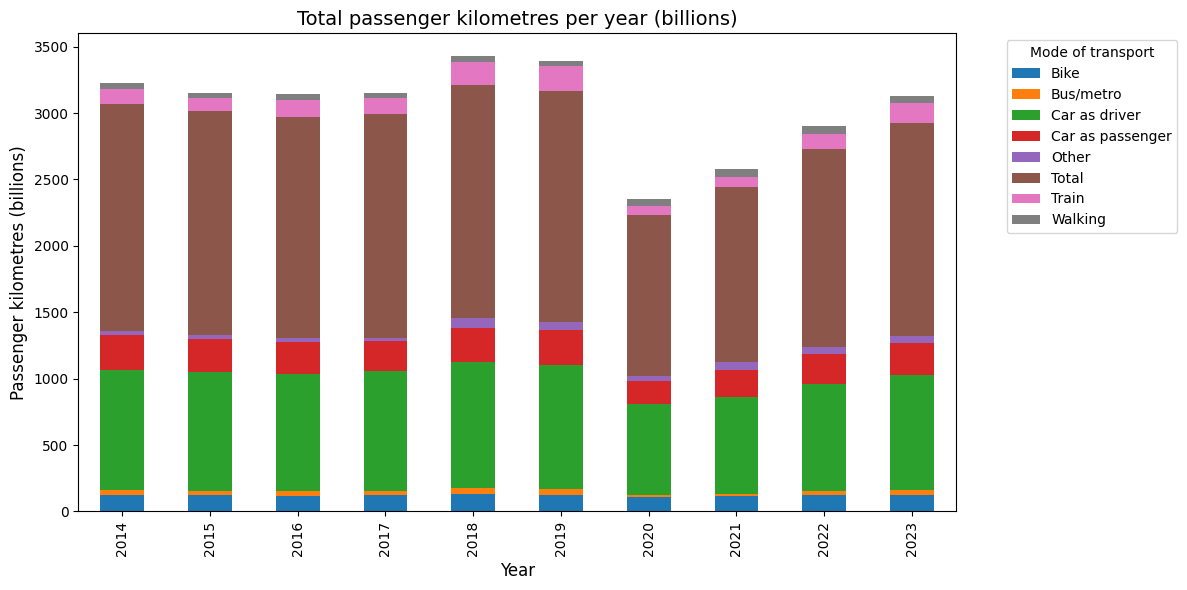

In [29]:
#staven
#dataframe alleen filteren voor werkverkeer. per mode of travel, per jaar, aantal kilometers

#df_motive = df_motive.iloc[:, [3, 6, 8]]
days_per_year = 365


pop = pd.read_csv("bontwikkeling.csv", sep=';', skiprows=4)  # Read population data
pop.columns = ["Year", "Population"]  # Set column names
pop = pop[pop["Year"].str.match(r"^\d{4}$", na=False)]  # Filter rows with valid year format
pop["Year"] = pop["Year"].astype(int)  # Convert 'Year' to integer
pop["Population"] = pd.to_numeric(pop["Population"], errors="coerce")  # Convert 'Population' to numeric


df["Periods"] = (df["Periods"].astype(str).str.replace("*", "", regex=False).str.strip())
df["Periods"] = pd.to_numeric(df["Periods"], errors="coerce")

df["Periods"] = df["Periods"].astype(int)

merged = pd.merge(df, pop, left_on="Periods", right_on="Year", how="left")
# === 3. Merge data and calculations ===


# Alles naar numeriek converteren (voor de zekerheid)
cols_to_num = [
    "Stages per person per day (average) (number)",
    "Distance travelled per stage (average) (passenger kilometres)",
    "Population"
]

for col in cols_to_num:
    merged[col] = pd.to_numeric(merged[col], errors="coerce")

# Eventueel NaN's checken
print(merged[cols_to_num].dtypes)
print(merged[cols_to_num].head())

# Daarna pas vermenigvuldigen
merged["Total passenger kilometres (annual)"] = (
    merged["Stages per person per day (average) (number)"] *
    merged["Distance travelled per stage (average) (passenger kilometres)"] *
    merged["Population"] *
    days_per_year
)



merged["Total passenger kilometres (annual, billions)"] = (
    merged["Total passenger kilometres (annual)"] / 1000000000
)



# Convert distance and stage column to numeric

df["Stages per person per day (average) (number)"] = pd.to_numeric(
    df["Stages per person per day (average) (number)"], errors="coerce"
)

df["Distance travelled per stage (average) (passenger kilometres)"] = pd.to_numeric(
    df["Distance travelled per stage (average) (passenger kilometres)"], errors="coerce"
)

#multiply distance and stages

df["Distance travelled per stage (average) (passenger kilometres)"] = (
    df["Stages per person per day (average) (number)"]
    * df["Distance travelled per stage (average) (passenger kilometres)"]
)

df = df[df["Modes of travel"] == "Bus/metro"]

df = df[df["Periods"].between(2014, 2024)]


pivot_df = merged.pivot_table(
    index="Periods",
    columns="Modes of travel",
    values="Total passenger kilometres (annual, billions)",
    aggfunc="sum"
)

plt.figure(figsize=(12, 6))
pivot_df.plot(kind="bar", stacked=True, ax=plt.gca())
plt.title("Total passenger kilometres per year (billions)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Passenger kilometres (billions)", fontsize=12)
plt.legend(title="Mode of transport", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




In [30]:
df["new"] = df[df["Distance travelled per stage (average) (passenger kilometres)"]*["Stages per person per day (average) (number)"]]
print(df["new"])

'''
df= df[["Modes of travel", "Periods", "Distance travelled per stage (average) (passenger kilometres)"]]


df["Periods"] = (df["Periods"].astype(str).str.replace("*", "", regex=False).str.strip())
df["Periods"] = pd.to_numeric(df["Periods"], errors="coerce")

# Convert distance column to numeric

df["Distance travelled per stage (average) (passenger kilometres)"] = pd.to_numeric(
    df["Distance travelled per stage (average) (passenger kilometres)"], errors="coerce"
)



df = df[df["Periods"].between(2014, 2024)]

pivot_df = df.pivot_table(
    index="Periods",
    columns="Modes of travel",
    values="Distance travelled per stage (average) (passenger kilometres)",
    aggfunc="var"
)

plt.figure(figsize=(12, 6))
pivot_df.plot(kind="bar", stacked=True, ax=plt.gca())


plt.title("Number of kilometers per year(2014–2024)", fontsize=14)
plt.xlabel("Periods", fontsize=12)
plt.ylabel("var km per traveler", fontsize=12)
plt.legend(title="Mode of transport", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
'''

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('float64'), dtype('<U44')) -> None

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

filename_part = "Total_transport_performance_in_the_Netherlands__modes_of_travel_and_regions_13102025_100421.csv"

#looking for the file starting from the notebook
start_dir = os.getcwd()

found_path = None

#Because the file could not be found on every laptop, we created a forloop that searches for the specific title on each seperate map, 
#When found, it returns the correct file needed. 

for root, dirs, files in os.walk(start_dir):
    for file in files:
        if filename_part in file:
            found_path = os.path.join(root, file)
            break
    if found_path:
        break

# Controleer of het bestand gevonden is
if not found_path:
    raise FileNotFoundError(f"File not found: '{filename_part} searched from: {start_dir}")


# CSV inlezen
df_1 = pd.read_csv(found_path, sep=";", encoding="utf-8", header=5)


print(df_1.head())

print(df_1.columns.tolist())

          Modes of travel                          Total  \
0                 Periods                           2018   
1  Region characteristics  billion passenger kilometres    
2         The Netherlands                          218.1   
3    Noord-Nederland (LD)                           25.0   
4     Oost-Nederland (LD)                           49.3   

                         Total.1                        Total.2  \
0                           2019                           2020   
1  billion passenger kilometres   billion passenger kilometres    
2                          218.8                          152.0   
3                           25.1                           17.1   
4                           49.8                           35.1   

                         Total.3                        Total.4  \
0                           2021                           2022   
1  billion passenger kilometres   billion passenger kilometres    
2                          168.4   

Kolommen: ['Modes of travel', 'Total', 'Total.1', 'Total.2', 'Total.3', 'Total.4', 'Total.5', 'Passenger car (driver)', 'Passenger car (driver).1', 'Passenger car (driver).2', 'Passenger car (driver).3', 'Passenger car (driver).4', 'Passenger car (driver).5', 'Passenger car (passenger)', 'Passenger car (passenger).1', 'Passenger car (passenger).2', 'Passenger car (passenger).3', 'Passenger car (passenger).4', 'Passenger car (passenger).5', 'Train', 'Train.1', 'Train.2', 'Train.3', 'Train.4', 'Train.5', 'Bus/tram/metro', 'Bus/tram/metro.1', 'Bus/tram/metro.2', 'Bus/tram/metro.3', 'Bus/tram/metro.4', 'Bus/tram/metro.5', 'Bike', 'Bike.1', 'Bike.2', 'Bike.3', 'Bike.4', 'Bike.5', 'Walking', 'Walking.1', 'Walking.2', 'Walking.3', 'Walking.4', 'Walking.5', 'Other', 'Other.1', 'Other.2', 'Other.3', 'Other.4', 'Other.5']


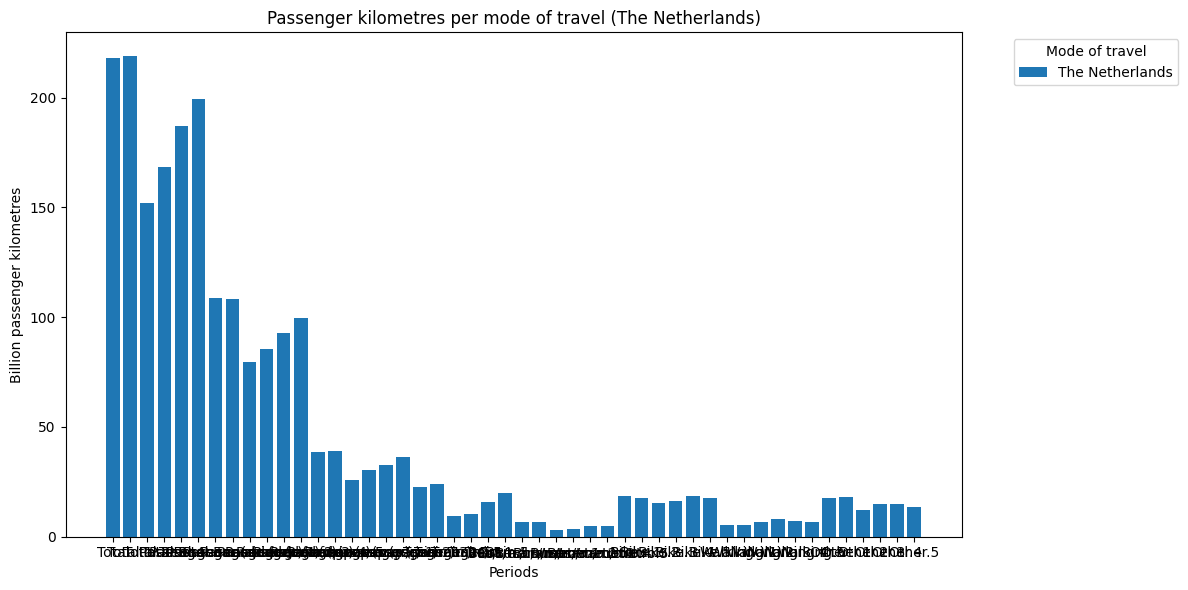

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lege kolommen/rijen verwijderen
df_1 = df_1.dropna(how='all').dropna(axis=1, how='all')

# Controleer de kolomnamen
print("Kolommen:", df_1.columns.tolist())

# --- FILTER VOOR 'THE NETHERLANDS' ---
# De eerste kolom bevat de mode/gebied aanduidingen
first_col = df_1.columns[0]

# Filter alleen de rij met 'The Netherlands'
df_1 = df_1[df_1[first_col].astype(str).str.strip().str.lower() == "the netherlands".lower()]

# Controleer of er iets overblijft
if df_1.empty:
    raise ValueError("Geen rijen gevonden met 'The Netherlands' — controleer de spelling of hoofdletters.")

# Zet dataset om van breed naar lang formaat
long_df_1 = df_1.melt(id_vars=first_col, var_name="Periods", value_name="Passenger_km_billion")
long_df_1.columns = ["Mode of travel", "Periods", "Passenger_km_billion"]

# Schoonmaken van getallen
long_df_1["Passenger_km_billion"] = (
    long_df_1["Passenger_km_billion"]
    .astype(str)
    .str.replace(",", ".")
    .str.extract(r"([\d\.]+)")[0]
)

# Ongeldige waarden naar NaN en converteren naar float
long_df_1["Passenger_km_billion"] = pd.to_numeric(
    long_df_1["Passenger_km_billion"].where(
        long_df_1["Passenger_km_billion"].str.match(r'^\d+(\.\d+)?$', na=False)
    ), 
    errors='coerce'
)

# Lege waarden verwijderen
long_df_1 = long_df_1.dropna(subset=["Passenger_km_billion"])

# --- Plot ---
plt.figure(figsize=(12, 6))
for mode in long_df_1["Mode of travel"].unique():
    subset = long_df_1[long_df_1["Mode of travel"] == mode]
    plt.bar(subset["Periods"], subset["Passenger_km_billion"], label=mode)

plt.title("Passenger kilometres per mode of travel (The Netherlands)")
plt.xlabel("Periods")
plt.ylabel("Billion passenger kilometres")
plt.legend(title="Mode of travel", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()










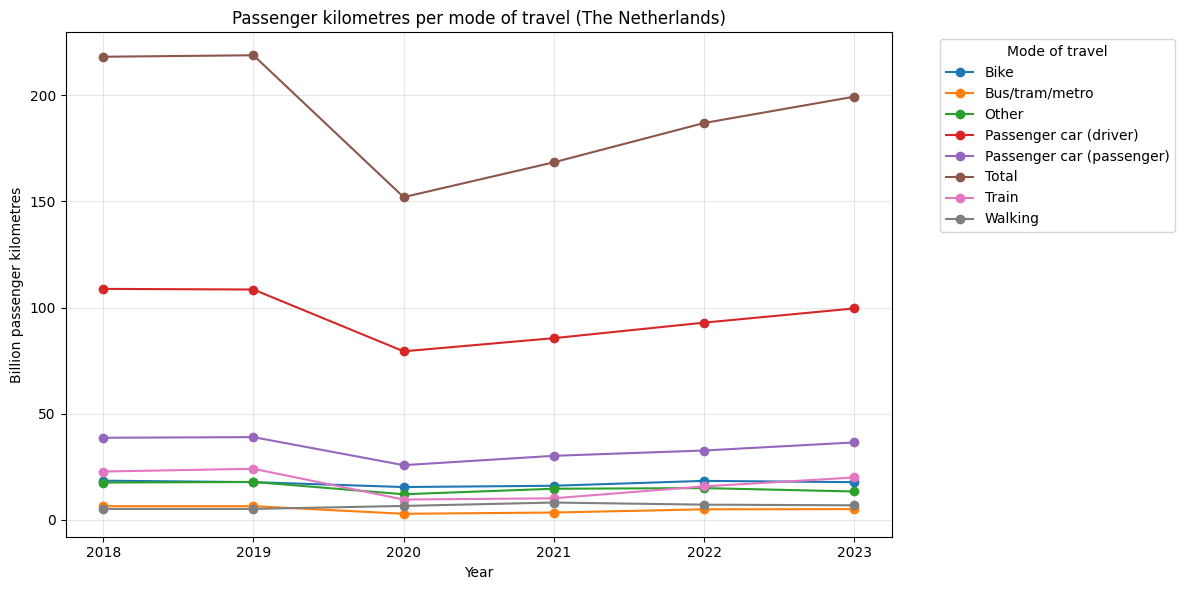

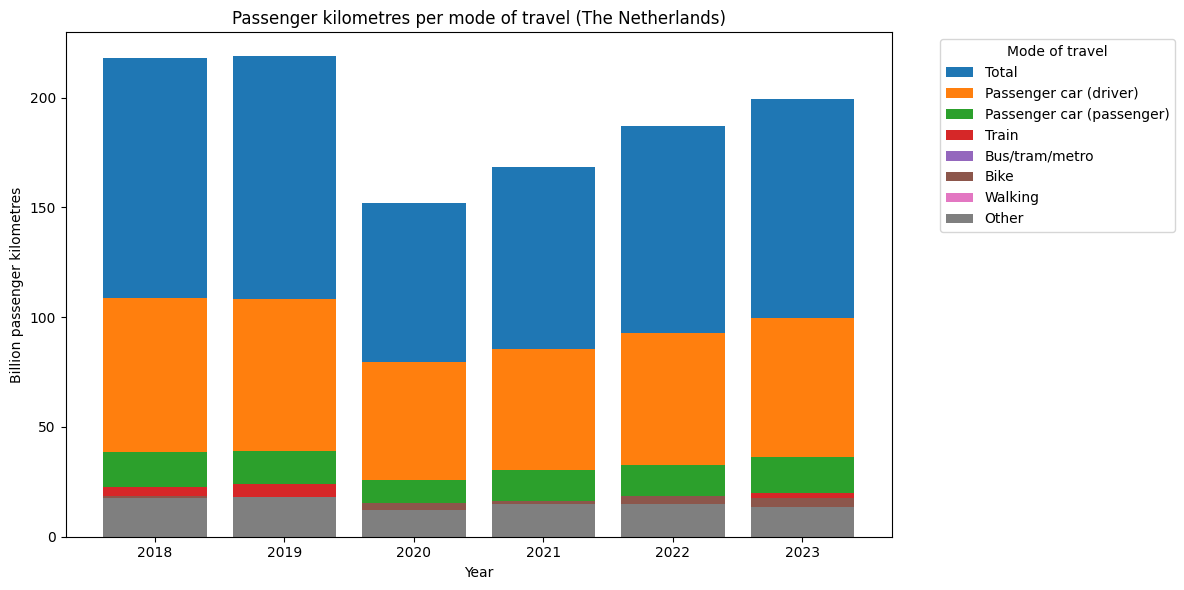

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Lege kolommen/rijen verwijderen
df_1 = df_1.dropna(how='all').dropna(axis=1, how='all')

# Eerste kolom is 'Modes of travel' of landnaam
first_col = df_1.columns[0]

# Filter alleen de rij met 'The Netherlands'
df_1 = df_1[df_1[first_col].astype(str).str.strip().str.lower() == "the netherlands"]
if df_1.empty:
    raise ValueError("Geen rijen gevonden met 'The Netherlands' — controleer de spelling of hoofdletters.")

# Zet de index terug (1 rij met alle kolommen)
df_1 = df_1.reset_index(drop=True)

# Maak een mapping van kolomnamen naar jaar
year_map = {None: 2018}
base_year = 2018
mapped_cols = {}

for c in df_1.columns:
    match = re.search(r"\.(\d+)$", c)
    if match:
        mapped_cols[c] = base_year + int(match.group(1))
    elif c != first_col:
        mapped_cols[c] = base_year  # zonder .x = eerste jaar
    else:
        mapped_cols[c] = c  # 'Modes of travel'

# Zet de data in lang formaat
long_df = df_1.melt(id_vars=[first_col], var_name="Mode_raw", value_name="Passenger_km_billion")
long_df["Periods"] = long_df["Mode_raw"].map(mapped_cols)

# Extract de vervoersmodus (verwijder .x suffix)
long_df["Modes of travel"] = long_df["Mode_raw"].str.replace(r"\.\d+$", "", regex=True)

# Schoonmaken van waarden
long_df["Passenger_km_billion"] = (
    long_df["Passenger_km_billion"]
    .astype(str)
    .str.replace(",", ".")
    .str.extract(r"([\d\.]+)")[0]
)
long_df["Passenger_km_billion"] = pd.to_numeric(long_df["Passenger_km_billion"], errors="coerce")
long_df = long_df.dropna(subset=["Passenger_km_billion"])

# Plotten
plt.figure(figsize=(12, 6))
for mode in sorted(long_df["Modes of travel"].unique()):
    subset = long_df[long_df["Modes of travel"] == mode]
    plt.plot(subset["Periods"], subset["Passenger_km_billion"], marker="o", label=mode)

plt.title("Passenger kilometres per mode of travel (The Netherlands)")
plt.xlabel("Year")
plt.ylabel("Billion passenger kilometres")
plt.legend(title="Mode of travel", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for mode in long_df["Modes of travel"].unique():
    subset = long_df[long_df["Modes of travel"] == mode]
    plt.bar(subset["Periods"], subset["Passenger_km_billion"], label=mode)

plt.title("Passenger kilometres per mode of travel (The Netherlands)")
plt.xlabel("Year")
plt.ylabel("Billion passenger kilometres")
plt.legend(title="Mode of travel", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(sorted(long_df["Periods"].unique()))
plt.tight_layout()
plt.show()
